In [1]:
# demo code for high quality text detection

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import re
from tqdm import tqdm
import string
from sklearn.model_selection import train_test_split

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\86183\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\86183\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [22]:
csv_path = '../../data/telegram/scrape.telegram_forwardsRT30.csv'
df_telegram = pd.read_csv(csv_path)
df_telegram_copy = df_telegram.copy()

C:\Users\86183\AppData\Local\Temp\ipykernel_10036\3333931622.py:2: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_telegram = pd.read_csv(csv_path)


In [4]:
df_head_copy = df_telegram_copy.head()
print(df_head_copy)

                        _id                           chat  channel_id  \
0  64f8a6078cac7d75547ac007  https://t.me/helpfulinfoforua  1632507926   
1  64f8a6078cac7d75547ac01a  https://t.me/helpfulinfoforua  1632507926   
2  64f8a6078cac7d75547ac018  https://t.me/helpfulinfoforua  1632507926   
3  64f8a6078cac7d75547ac01c  https://t.me/helpfulinfoforua  1632507926   
4  64f8a6078cac7d75547ac015  https://t.me/helpfulinfoforua  1632507926   

                update_time      country state city  views  forwards  replies  \
0  2023-09-06T18:17:11.746Z  Switzerland   NaN  NaN   7159        42      124   
1  2023-09-06T18:17:11.747Z  Switzerland   NaN  NaN   6026        50       31   
2  2023-09-06T18:17:11.747Z  Switzerland   NaN  NaN   3617        58        2   
3  2023-09-06T18:17:11.747Z  Switzerland   NaN  NaN   3113        37       11   
4  2023-09-06T18:17:11.746Z  Switzerland   NaN  NaN  10435        76      296   

   ...  reactions.🍾 reactions.🍓 reactions.💋  reactions.😈  reactions.

range1: (31.00, 144.04), count: 3893.0
range2: (144.04, 656.41), count: 1846.0
range3: (656.41, 2978.77), count: 524.0
range4: (2978.77, 13505.03), count: 114.0
range5: (13505.03, 61216.00), count: 13.0


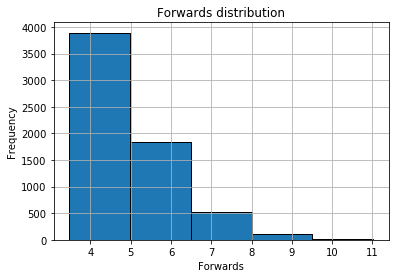

In [23]:
forwards_data = df_telegram_copy['forwards']
forwards_data_log = np.log1p(forwards_data)
counts, bin_edge, _ = plt.hist(forwards_data_log, bins=5, edgecolor='k')
plt.xlabel('Forwards')
plt.ylabel('Frequency')
plt.title('Forwards distribution')
plt.grid(True)

# print range and number
for i in range(len(counts)):
    start = bin_edge[i]
    end = bin_edge[i+1]
    start_ = np.expm1(start)
    end_ = np.expm1(end)
    count = counts[i]
    print(f"range{i+1}: ({start_:.2f}, {end_:.2f}), count: {count}")

plt.show()

数据清洗

In [24]:
# 数据清洗

# stopwords, add ukrainian stopwords from .txt file
stopWords = stopwords.words('english') 
for word in stopwords.words('german'):
    stopWords.append(word)
for word in stopwords.words('french'):
    stopWords.append(word)
for word in stopwords.words('italian'):
    stopWords.append(word)
for word in stopwords.words('russian'):
    stopWords.append(word)
with open("../../data/stopwords/stopwords_ua.txt") as file: #add ukrainian stopwords loaded from .txt file
    ukrstopWords = [line.rstrip() for line in file]
for stopwords in ukrstopWords:
    stopWords.append(stopwords)
    
def remove_stopwords(text):
    new_text = []
    for word in text.split():
        if word in stopWords:
            continue
        else:
            new_text.append(word)
    return ''.join(new_text)
    
# lowercasing
def concert_lowercase(text):
    text = text.lower()
    return text

# removing HTML Tags
def remove_html(text):
    remove_ = re.compile('<.*?')
    return re.sub(remove_, r'', text)

# removing URLs
def remove_url(text):
    re_url = re.compile('https?://\S+|www\.\S+')
    return re_url.sub('', text)

# removing emojis, from git
def remove_emojis(text):
    emoji_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F700-\U0001F77F"  # alchemical symbols
        u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
        u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
        u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
        u"\U0001FA00-\U0001FA6F"  # Chess Symbols
        u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
        u"\U00002702-\U000027B0"  # Dingbats
        u"\U000024C2-\U0001F251"  
        "]+", flags = re.UNICODE)
    return emoji_pattern.sub(r'', text)

# removing punctuations
exclude = string.punctuation
def remove_punc(text):
    return text.translate(str.maketrans('', '', exclude))

# tokenization 
def tokenize(text):
    new_text = sent_tokenize(text)
    return new_text

def clean_telegram(df):
    return df.apply(remove_stopwords).apply(concert_lowercase).apply(remove_html).apply(remove_url).apply(remove_emojis).apply(remove_punc).str.join('').apply(tokenize)

df_telegram_copy['messageText'] = clean_telegram(df_telegram_copy['messageText']).apply(lambda x: ' '.join(x))
df_telegram_copy.head()

,_id,chat,channel_id,update_time,country,state,city,views,forwards,replies,...,reactions.🍾,reactions.🍓,reactions.💋,reactions.😈,reactions.🤪,reactions.🌚,reactions.💘,reactions.🙈,reactions.🖕,reactions.😐
0,64f8a6078cac7d75547ac007,https://t.me/helpfulinfoforua,1632507926,2023-09-06T18:17:11.746Z,Switzerland,NaN,NaN,7159,42,124,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,64f8a6078cac7d75547ac01a,https://t.me/helpfulinfoforua,1632507926,2023-09-06T18:17:11.747Z,Switzerland,NaN,NaN,6026,50,31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,64f8a6078cac7d75547ac018,https://t.me/helpfulinfoforua,1632507926,2023-09-06T18:17:11.747Z,Switzerland,NaN,NaN,3617,58,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,64f8a6078cac7d75547ac01c,https://t.me/helpfulinfoforua,1632507926,2023-09-06T18:17:11.747Z,Switzerland,NaN,NaN,3113,37,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,64f8a6078cac7d75547ac015,https://t.me/helpfulinfoforua,1632507926,2023-09-06T18:17:11.746Z,Switzerland,NaN,NaN,10435,76,296,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


手动划分标签

   forwards                                        messageText  label
0        42  вітаємоканалікорисноhelpfulшвейцарськогочервон...      0
1        50  якіпропозиціїпідтримкивашомукантоніnнасайтіhel...      0
2        58  якоформитисамозайнятістьшвейцаріїстатусомsnnnп...      0
3        37  •якіспортивнікультурнізаходидітейпідлітківдоро...      0
4        76  дорогіучасникигрупиnnрадіоголоситидругачастина...      0
range1: (0.0, 307.1), count: 3065.0
range2: (307.1, 614.2), count: 1664.0
range3: (614.2, 921.3000000000001), count: 782.0
range4: (921.3000000000001, 1228.4), count: 300.0
range5: (1228.4, 1535.5), count: 268.0
range6: (1535.5, 1842.6000000000001), count: 97.0
range7: (1842.6000000000001, 2149.7000000000003), count: 81.0
range8: (2149.7000000000003, 2456.8), count: 49.0
range9: (2456.8, 2763.9), count: 54.0
range10: (2763.9, 3071.0), count: 30.0


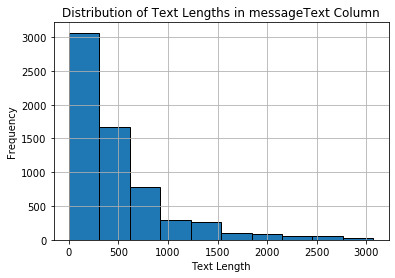

3071


In [26]:
threshold_quality = 2500
df_telegram_copy['label'] = df_telegram_copy['forwards'].apply(lambda x: 1 if x >= threshold_quality else 0)
# df_telegram_copy.head()

df_clean = df_telegram_copy[['forwards', 'messageText', 'label']]
print(df_clean.head())
file_name='../../data/telegram/preproceed_data.csv'
df_clean.to_csv(file_name, index=False)

text_lengths = [len(text) for text in df_clean['messageText']]
bin_counts, bin_edges, _ = plt.hist(text_lengths, bins=10, edgecolor='k')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.title('Distribution of Text Lengths in messageText Column')
plt.grid(True)
for i in range(len(bin_counts)):
    start = bin_edges[i]
    end = bin_edges[i + 1]
    count = bin_counts[i]
    print(f"range{i+1}: ({start}, {end}), count: {count}")
plt.show()

print(df_clean['messageText'].str.len().max())

pytorch regression

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
from transformers import BertTokenizer, AdamW, BertModel
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd

df_clean = pd.read_csv('../../data/telegram/preproceed_data.csv')
# devide training and validation dataset
X_train, X_val, y_train, y_val = train_test_split(df_clean['messageText'], df_clean['forwards'], test_size=0.2, random_state = 24)

# tokenize with pretrained model
max_length = 1024
tokenizer = BertTokenizer.from_pretrained("bert-base-ukrainian-cased")
X_train_encode = tokenizer(list(X_train), truncation=True, padding=True, max_length=max_length, return_tensors="pt")
X_val_encode = tokenizer(list(X_val), truncation=True, padding=True, max_length=max_length, return_tensors="pt")

train_dateset = TensorDataset(X_train_encode["input_ids"], X_train_encode["attention_mask"], torch.tensor(y_train.values, dtype=torch.float32))
val_dataset = TensorDataset(X_val_encode["input_ids"], X_val_encode["attention_mask"], torch.tensor(y_val.values, dtype=torch.float32))

batch_size = 32
train_loader = DataLoader(train_dateset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)

# regression model
class RegressionModel(nn.Module):
    def __init__(self):
        super(RegressionModel, self).__init__()
        self.bert = BertModel.from_pretrained("bert-base-ukrainian-cased")
        self.dropout = nn.Dropout(0.2)
        self.linear = nn.Linear(768, 1)

    def forward(self, input_ids, attention_mask):
        output = self.bert(input_ids, attention_mask=attention_mask)
        output = output.pooler_output
        output = self.dropout(output)
        logits = self.linear(output)
        return logits

model = RegressionModel()

Loss = nn.MSELoss()
optimizer = optim.AdamW(model.parameters(), lr=2e-5)

# train model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
epochs = 5

def train_model(epochs, train_loader, val_loader):
    training_loss = []
    validating_loss = []

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        for batch in train_loader:
            input_ids, attention_mask, labels = batch
            input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)
            
            optimizer.zero_grad()
            outputs = model(input_ids, attention_mask)
            loss = Loss(outputs.squeeze(1), labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
        
        epoch_loss = running_loss / len(train_loader)
        training_loss.append(epoch_loss)
        print(f"Epoch {epoch + 1}/{epochs}, Loss: {epoch_loss:.4f}")

        # evaluate model
        model.eval()
        val_loss = 0.0
        predictions = []

        with torch.no_grad():
            for batch in val_loader:
                input_ids, attention_mask, labels = batch
                input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)
                
                outputs = model(input_ids, attention_mask)
                loss = Loss(outputs.squeeze(1), labels)
                val_loss += loss.item()
                
                predictions.extend(outputs.cpu().squeeze(1).numpy())

        val_loss /= len(val_loader)
        validating_loss.append(val_loss)
        print(f"Validation Loss: {val_loss:.4f}")

        # evaluation matrics
        predictions = np.array(predictions)
        mse = mean_squared_error(y_val, predictions)
        mae = mean_absolute_error(y_val, predictions)

        print(f"Mean Squared Error: {mse:.4f}")
        print(f"Mean Absolute Error: {mae:.4f}")
    
    return model, training_loss, validating_loss, predictions

def plot_loss(training_loss, validating_loss):
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, len(training_loss) + 1), training_loss, label='Training Loss', marker='o')
    plt.plot(range(1, len(validating_loss) + 1), validating_loss, label='Validation Loss', marker='o')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.grid(True)
    plt.show()
    
def plot_scatter(y_val, predictions):
    predictions = np.array(predictions)
    y_val = np.array(y_val)
    plt.figure(figsize=(10, 6))
    plt.scatter(y_val, predictions, c='blue', alpha=0.5)
    plt.title('Scatter Plot of Predictions vs Real Values')
    plt.xlabel('Real Values')
    plt.ylabel('Predicted Values')
    plt.grid(True)
    plt.show()
    

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Epoch 1/5, Loss: 2945318.2323
Validation Loss: 994527.0432
Mean Squared Error: 995865.5656
Mean Absolute Error: 302.3334
Epoch 2/5, Loss: 2927516.3415
Validation Loss: 991992.1431
Mean Squared Error: 993329.6759
Mean Absolute Error: 298.1050
Epoch 3/5, Loss: 2925007.2335
Validation Loss: 990410.0837
Mean Squared Error: 991747.0969
Mean Absolute Error: 295.4382
Epoch 4/5, Loss: 2924161.7178
Validation Loss: 989088.2758
Mean Squared Error: 990424.7768
Mean Absolute Error: 293.1920
Epoch 5/5, Loss: 2921691.3137
Validation Loss: 987838.1685
Mean Squared Error: 989174.2008
Mean Absolute Error: 291.0512


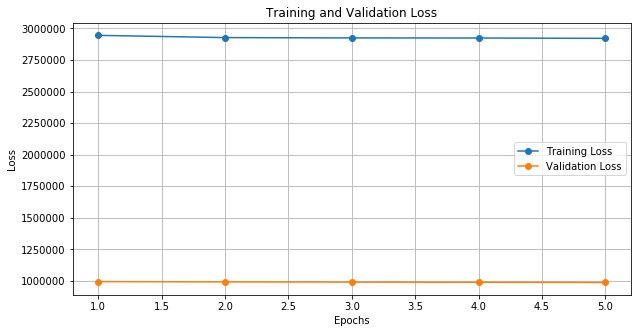

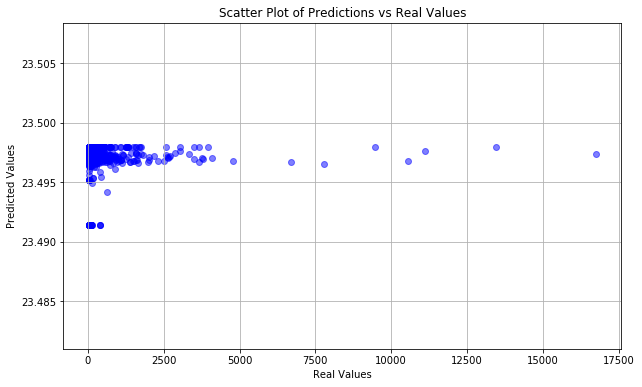

In [12]:
# train model
model_bert_32_5, training_loss, validating_loss, predictions = train_model(epochs, train_loader, val_loader)

# plot
plot_loss(training_loss, validating_loss)
plot_scatter(y_val, predictions)

In [9]:
torch.save(model_bert_32_5.state_dict(), 'bert_regression_model_01.pth')